<a href="https://colab.research.google.com/github/savioratharv/S4DS_ML_Task/blob/main/s4ds_final_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import regex

Reading the csv file, dropping rows with a price range, converting price to float and filling missing values with the mean,  dropping irrelevant and duplicate columns

In [2]:
dataset = pd.read_csv('/content/Amazon_Products.csv', on_bad_lines = 'skip')
dataset = dataset.drop(['number_available_in_stock','product_description','customer_questions_and_answers'],axis=1)
index = []
for i in range(9990):
  if('-' in str(dataset['price'][i])):
    index.append(i)
dataset.drop(index,inplace=True)
dataset = dataset.drop(dataset.index[1998:2006])
dataset['price'] = dataset['price'].str.replace(r'\,', '')
dataset['price'] = dataset['price'].str.replace(r'\£', '').astype(float)
x = dataset['price'].mean()
dataset['price'].fillna(x, inplace = True)
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print(dataset['price'])
print(dataset)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,2

0         3.42
1        16.99
2         9.99
3        39.99
4        32.19
         ...  
9999     22.95
10000    39.99
10001    43.99
10002    49.81
10003    21.20
Name: price, Length: 9978, dtype: float64
                                uniq_id  \
0      eac7efa5dbd3d667f26eb3d3ab504464   
1      b17540ef7e86e461d37f3ae58b7b72ac   
2      348f344247b0c1a935b1223072ef9d8a   
3      e12b92dbb8eaee78b22965d2a9bbbd9f   
4      e33a9adeed5f36840ccc227db4682a36   
...                                 ...   
9999   44d6967f083825a5de36ad4865a65bcd   
10000  08f0747b6fc6687215ffb994c3a6fb32   
10001  bf6cc073f8f24e6e338190fa16f6ee9d   
10002  cd783d0b8b44e631b9788b203eaaefae   
10003  94d18e86e504bee1e392df7e5738b18a   

                                            product_name  \
0                                  Hornby 2014 Catalogue   
1      FunkyBuys® Large Christmas Holiday Express Fes...   
2      CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...   
3         HORNBY Coach R4410A BR Haw

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Converting the Average Review Rating to float

In [3]:
dataset['average_review_rating'] = dataset['average_review_rating'].str.replace(r'\ out of 5 stars', '').astype(float)
print(dataset['average_review_rating'])

0        4.9
1        4.5
2        3.9
3        5.0
4        4.7
        ... 
9999     5.0
10000    4.0
10001    5.0
10002    5.0
10003    4.5
Name: average_review_rating, Length: 9978, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Filling missing values in Average Review Rating with the mean

In [4]:
x = dataset['average_review_rating'].mean()
dataset['average_review_rating'].fillna(x, inplace = True)

In [5]:
print(dataset['number_of_reviews'])

0        15.0
1         2.0
2        17.0
3         1.0
4         3.0
         ... 
9999        3
10000       1
10001       1
10002       1
10003      11
Name: number_of_reviews, Length: 9978, dtype: object


In [6]:
print(dataset['average_review_rating'])

0        4.9
1        4.5
2        3.9
3        5.0
4        4.7
        ... 
9999     5.0
10000    4.0
10001    5.0
10002    5.0
10003    4.5
Name: average_review_rating, Length: 9978, dtype: float64


Scatter Plotting Manufacturers vs Average Review Rating and comparing them with price using hue [Seaborn]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

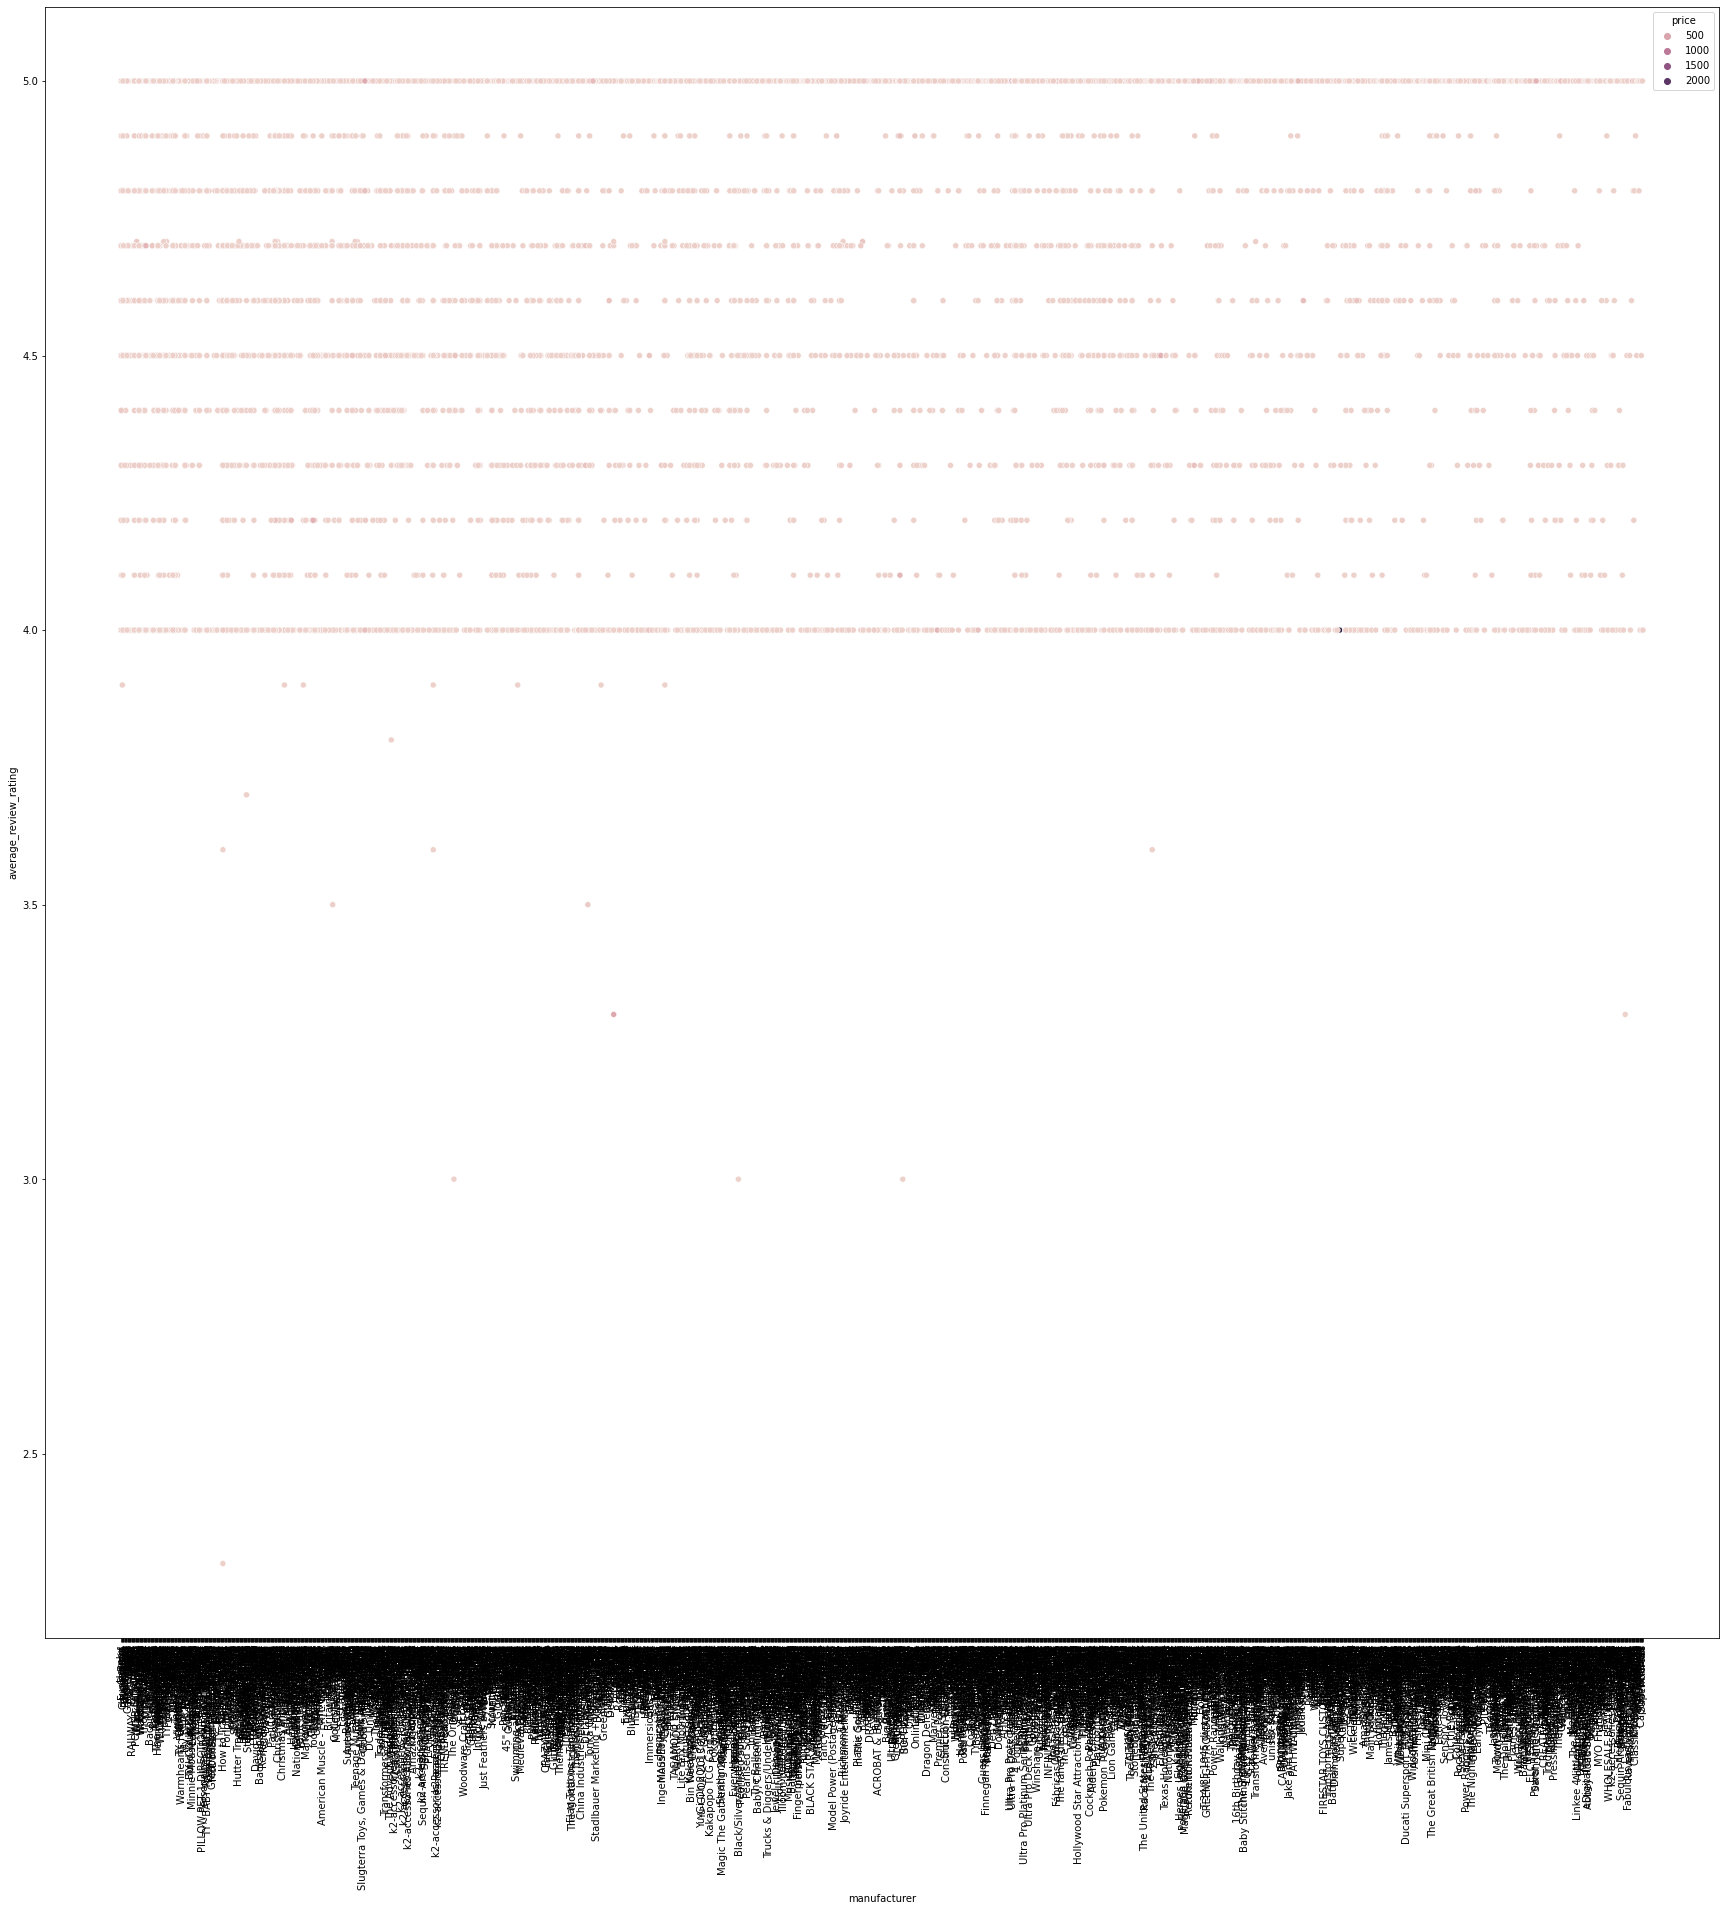

In [7]:
plt.figure(figsize=(30,30))
sns.scatterplot(y=dataset['average_review_rating'],x=dataset['manufacturer'],hue=dataset['price'],data=dataset)
plt.xticks(rotation='vertical')

Scatter Plotting Average Review Rating vs Price with Manufacturers as hue [Seaborn]

In [8]:
plt.figure(figsize=(30,30))
sns.scatterplot(x=dataset['average_review_rating'],hue=dataset['manufacturer'],y=dataset['price'],data=dataset)
plt.xticks(rotation='vertical')

(array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 8 Text major ticklabel objects>)

Making a Bar Plot to compare the catergories and sub categories with their respective prices and using Average Review Rating as Hue to portray the general sentiment of the Consumers [Seaborn]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

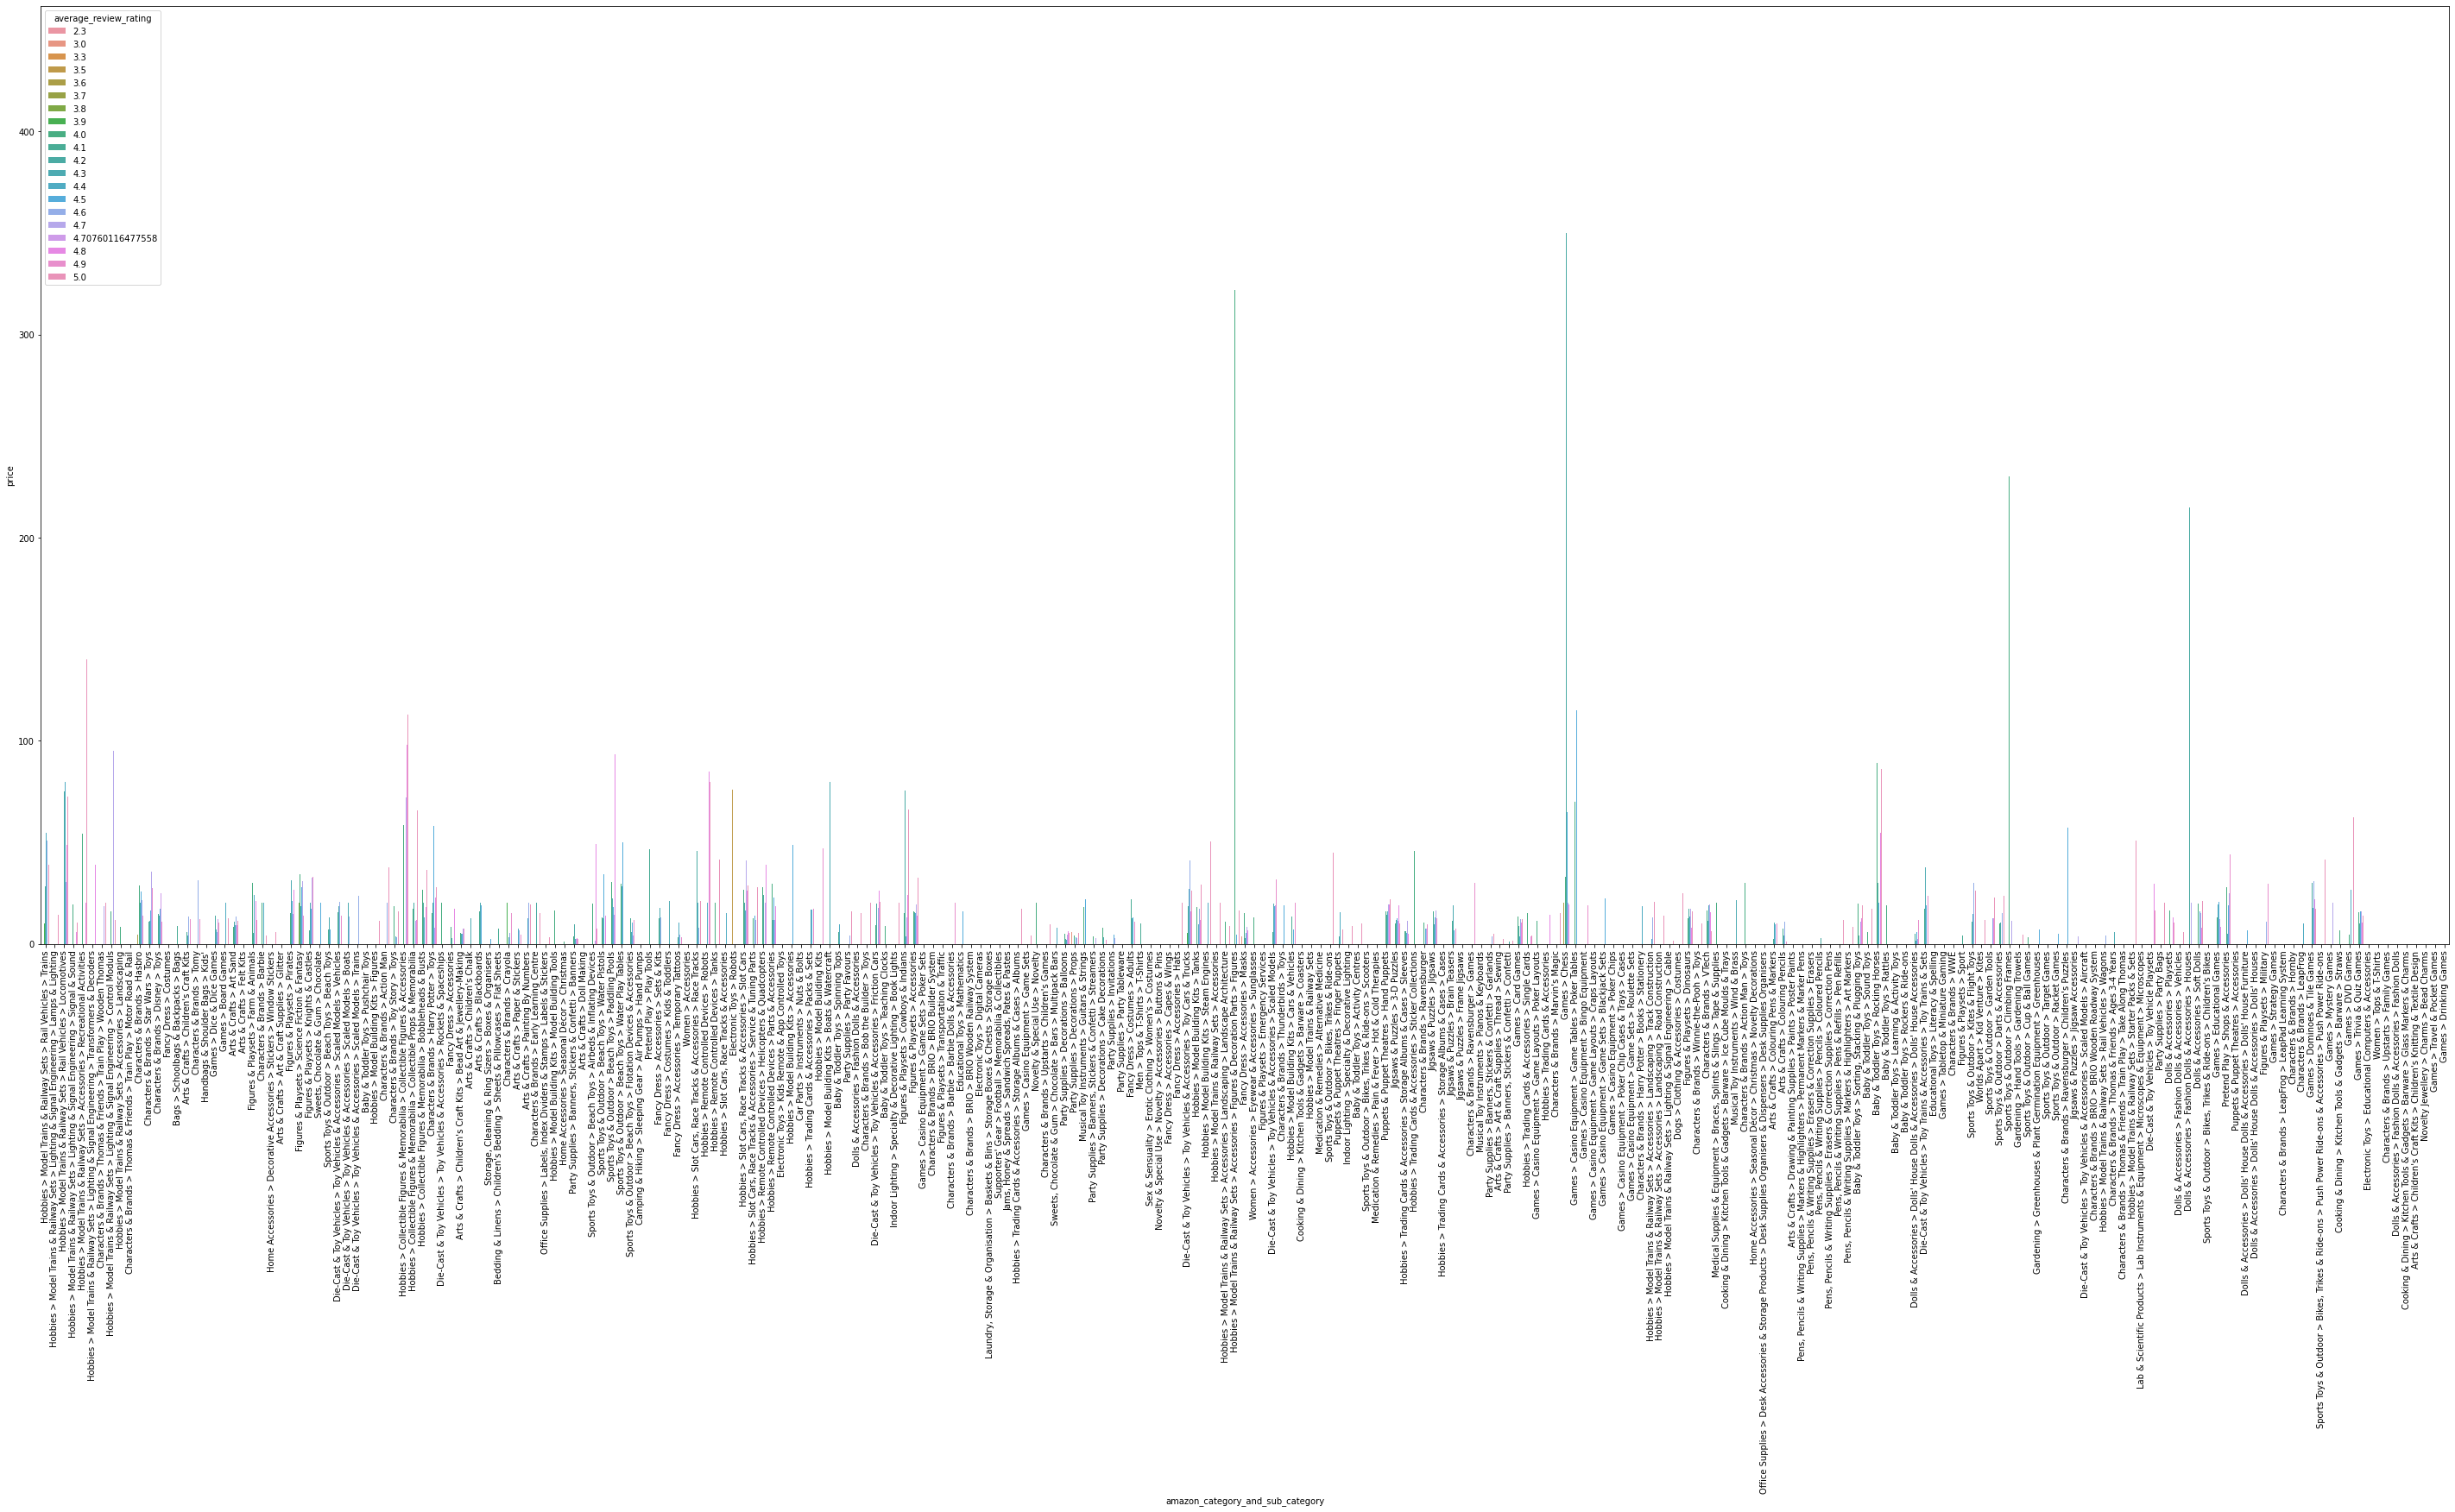

In [9]:
plt.figure(figsize=(50,20))
sns.barplot(hue=dataset['average_review_rating'],x=dataset['amazon_category_and_sub_category'],y=dataset['price'],ci=None,data=dataset)
plt.xticks(rotation='vertical')

Scatter Plotting Price vs Average Review Rating to check if there is any relation between them [Seaborn]

(array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 8 Text major ticklabel objects>)

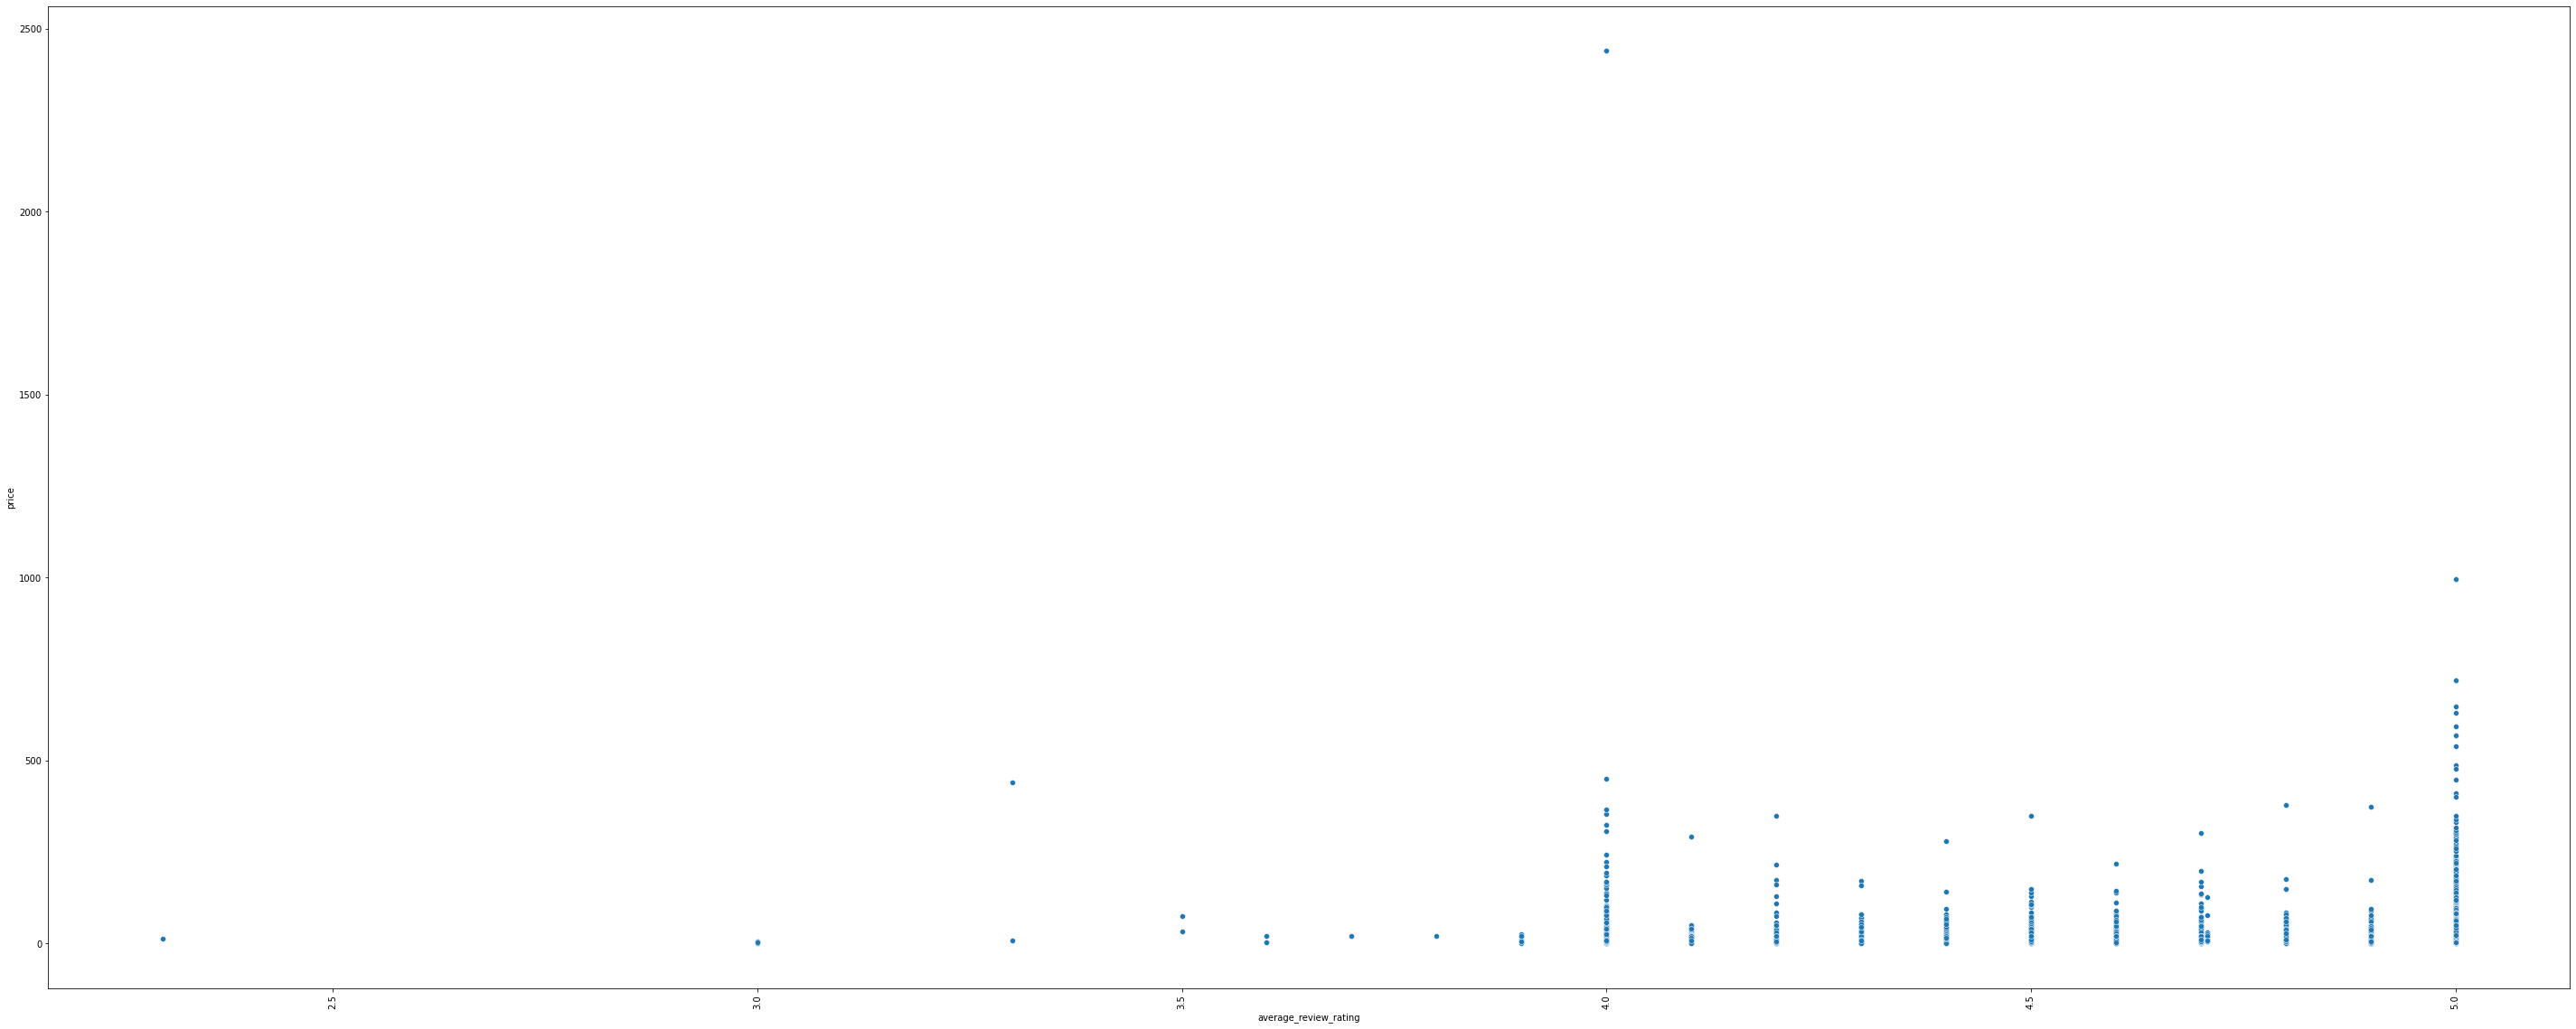

In [10]:
plt.figure(figsize=(50,20))
sns.scatterplot(x=dataset['average_review_rating'],y=dataset['price'],data=dataset)
plt.xticks(rotation='vertical')

Finding the Unique Manufacturers

In [11]:
manu=dataset['manufacturer'].unique()

Inserting a new row 'super_category' to store the main categories each product belongs to

In [12]:
dataset.insert(8,'super_category',value=' ')

Inserting a new row 'specific_category' to store the specific category of each product

In [13]:
dataset.insert(9,'specific_category',value=' ')

In [14]:
print(dataset)

                                uniq_id  \
0      eac7efa5dbd3d667f26eb3d3ab504464   
1      b17540ef7e86e461d37f3ae58b7b72ac   
2      348f344247b0c1a935b1223072ef9d8a   
3      e12b92dbb8eaee78b22965d2a9bbbd9f   
4      e33a9adeed5f36840ccc227db4682a36   
...                                 ...   
9999   44d6967f083825a5de36ad4865a65bcd   
10000  08f0747b6fc6687215ffb994c3a6fb32   
10001  bf6cc073f8f24e6e338190fa16f6ee9d   
10002  cd783d0b8b44e631b9788b203eaaefae   
10003  94d18e86e504bee1e392df7e5738b18a   

                                            product_name  \
0                                  Hornby 2014 Catalogue   
1      FunkyBuys® Large Christmas Holiday Express Fes...   
2      CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...   
3         HORNBY Coach R4410A BR Hawksworth Corridor 3rd   
4      Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...   
...                                                  ...   
9999   Batman 1966 TV Series Action Figures - The Rid...   
100

Using the basic string function 'split' to classify the 'amazon_category_and_sub_category' column to its main and specific categories and then storing it in the respective columns recently created

In [15]:
for i in range(0,9978):
  if(i not in index and i not in [2003,2004,2005,2006,2006,2007,2008,2009,2010,2011,2012,2013,2014]):
    dataset['super_category'][i]=str(dataset['amazon_category_and_sub_category'][i]).split(">",1)[0]
    dataset['specific_category'][i]=str(dataset['amazon_category_and_sub_category'][i]).split(">")[-1]
print(dataset['super_category'].unique())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


['Hobbies ' 'nan' 'Characters & Brands ' 'Fancy Dress ' 'Bags '
 'Arts & Crafts ' 'Handbags & Shoulder Bags ' 'Games '
 'Figures & Playsets ' 'Home Accessories ' 'Sweets, Chocolate & Gum '
 'Sports Toys & Outdoor ' 'Die-Cast & Toy Vehicles '
 'Baby & Toddler Toys ' 'Storage, Cleaning & Ring Sizers '
 'Bedding & Linens ' 'Office Supplies ' 'Party Supplies '
 'Camping & Hiking ' 'Pretend Play ' 'Women ' ' ' 'Electronic Toys '
 'Car Parts ' 'Dolls & Accessories ' 'Indoor Lighting '
 'Educational Toys ' 'Laundry, Storage & Organisation '
 "Supporters' Gear " 'Jams, Honey & Spreads ' 'Novelty & Special Use '
 'Musical Toy Instruments ' 'Men ' 'Sex & Sensuality ' 'Cooking & Dining '
 'Medication & Remedies ' 'Puppets & Puppet Theatres '
 'Jigsaws & Puzzles ' 'Dogs ' 'Medical Supplies & Equipment '
 'Pens, Pencils & Writing Supplies ' 'Worlds Apart ' 'Gardening '
 'Lab & Scientific Products ' 'Novelty Jewellery ']


In [16]:
print(dataset['specific_category'].unique())

[' Trains' ' Lamps & Lighting' ' Locomotives' ' Signal & Sound'
 ' Recreational Activities' ' Transformers & Decoders' 'nan'
 ' Wooden Thomas' ' Control Moduls' ' Landscaping' ' Motor Road & Rail'
 ' Hasbro' ' Toys' ' Costumes' ' Bags' " Children's Craft Kits" ' Tomy'
 " Kids'" ' Dice & Dice Games' ' Board Games' ' Art Sand' ' Felt Kits'
 ' Farm & Animals' ' Barbie' ' Window Stickers' ' Glitter' ' Pirates'
 ' Science Fiction & Fantasy' ' Knights & Castles' ' Chocolate'
 ' Beach Toys' ' Vehicles' ' Boats' ' Pushchair Toys' ' Figures'
 ' Action Man' ' Collectible Figures & Accessories'
 ' Collectible Props & Memorabilia' ' Bobbleheads & Busts'
 ' Rockets & Spaceships' ' Accessories' ' Bead Art & Jewellery-Making'
 " Children's Chalk" ' Blackboards' ' Boxes & Organisers' ' Flat Sheets'
 ' Crayola' ' Paper & Stickers' ' Painting By Numbers'
 ' Early Learning Centre' ' Labels & Stickers' ' Model Building Tools'
 ' Christmas' ' Banners' ' Doll Making' ' Airbeds & Inflating Devices'
 ' Water 

Plotting a Bar Graph to compare the specific categories with price and rating [Seaborn]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

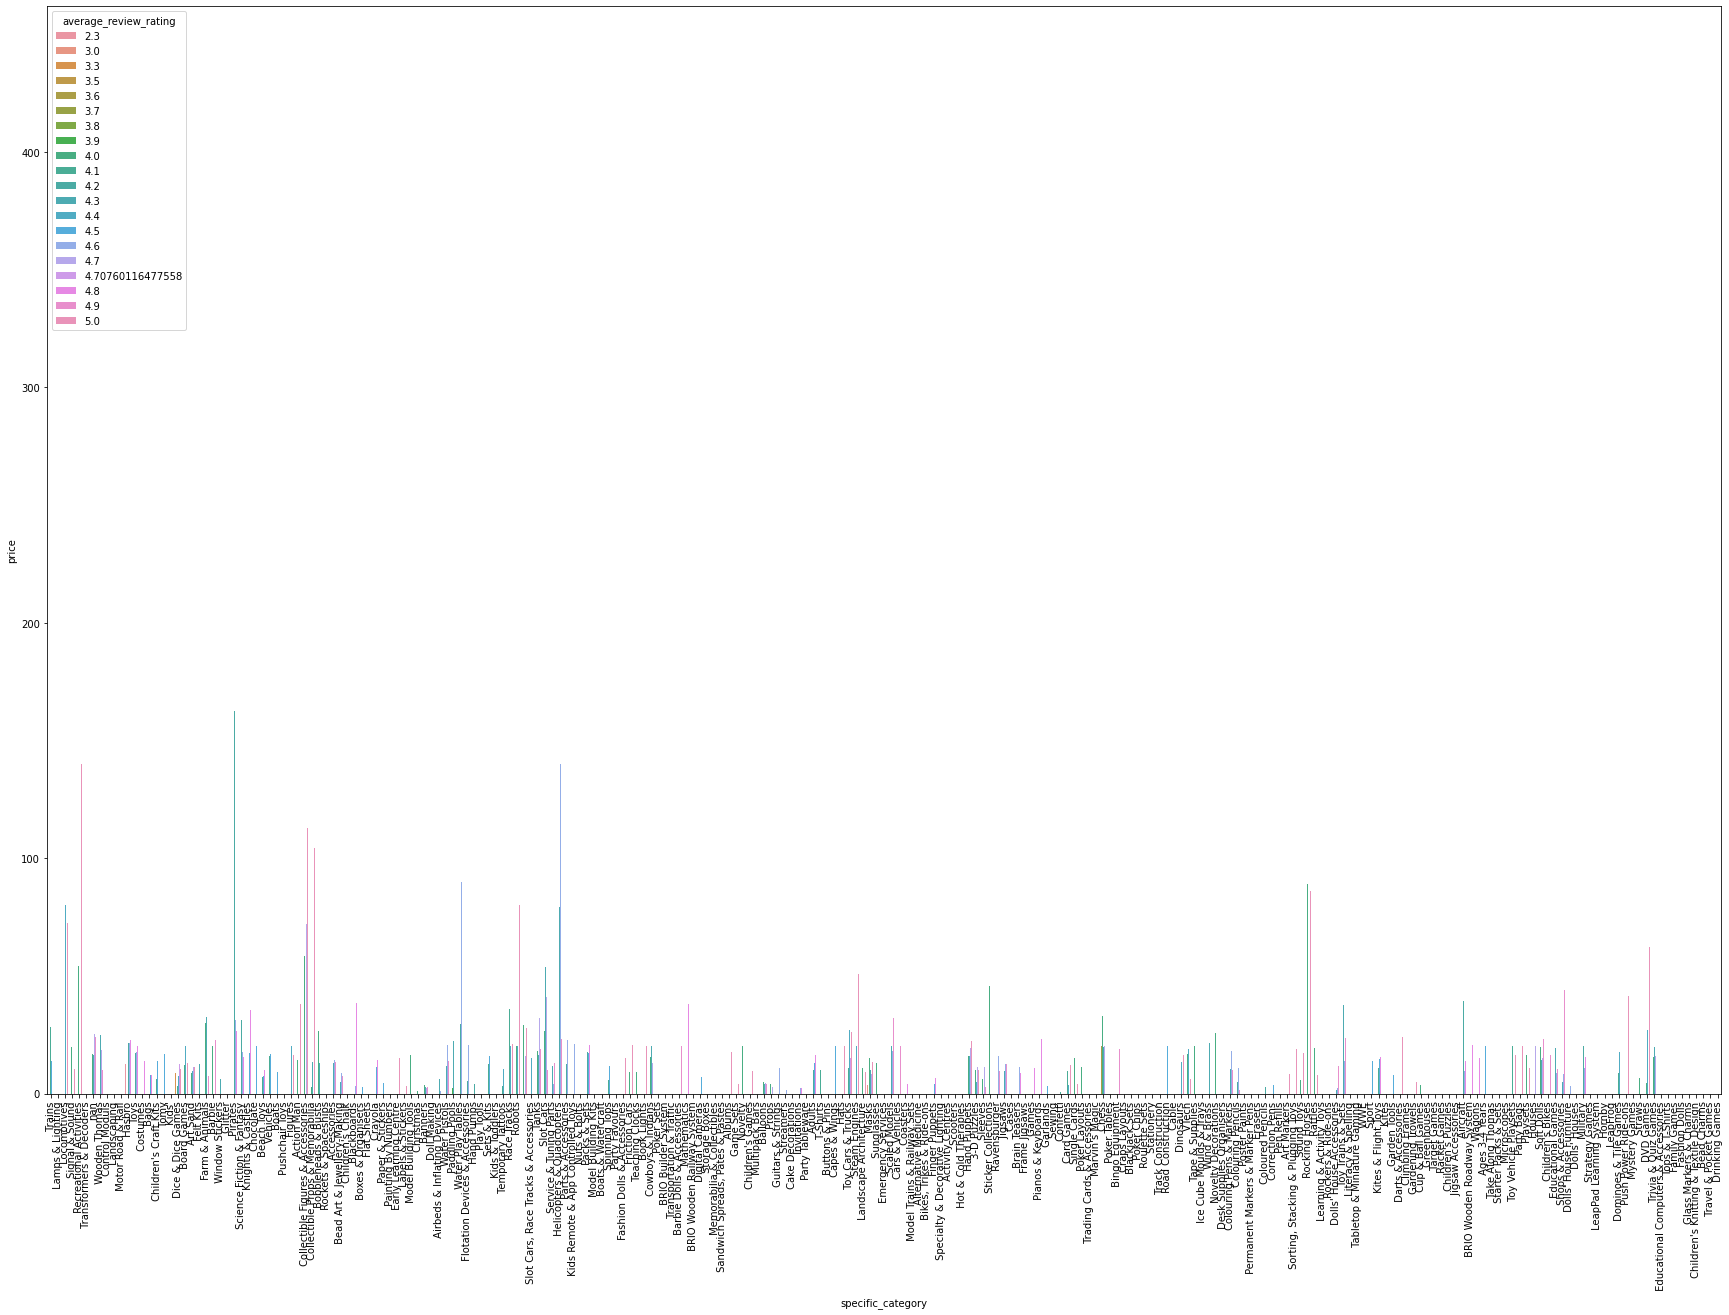

In [17]:
plt.figure(figsize=(30,20))
sns.barplot(hue=dataset['average_review_rating'],x=dataset['specific_category'],y=dataset['price'],ci=None,data=dataset)
plt.xticks(rotation='vertical')

Plotting a Bar Graph to compare the main/super categories with price and rating [Seaborn]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

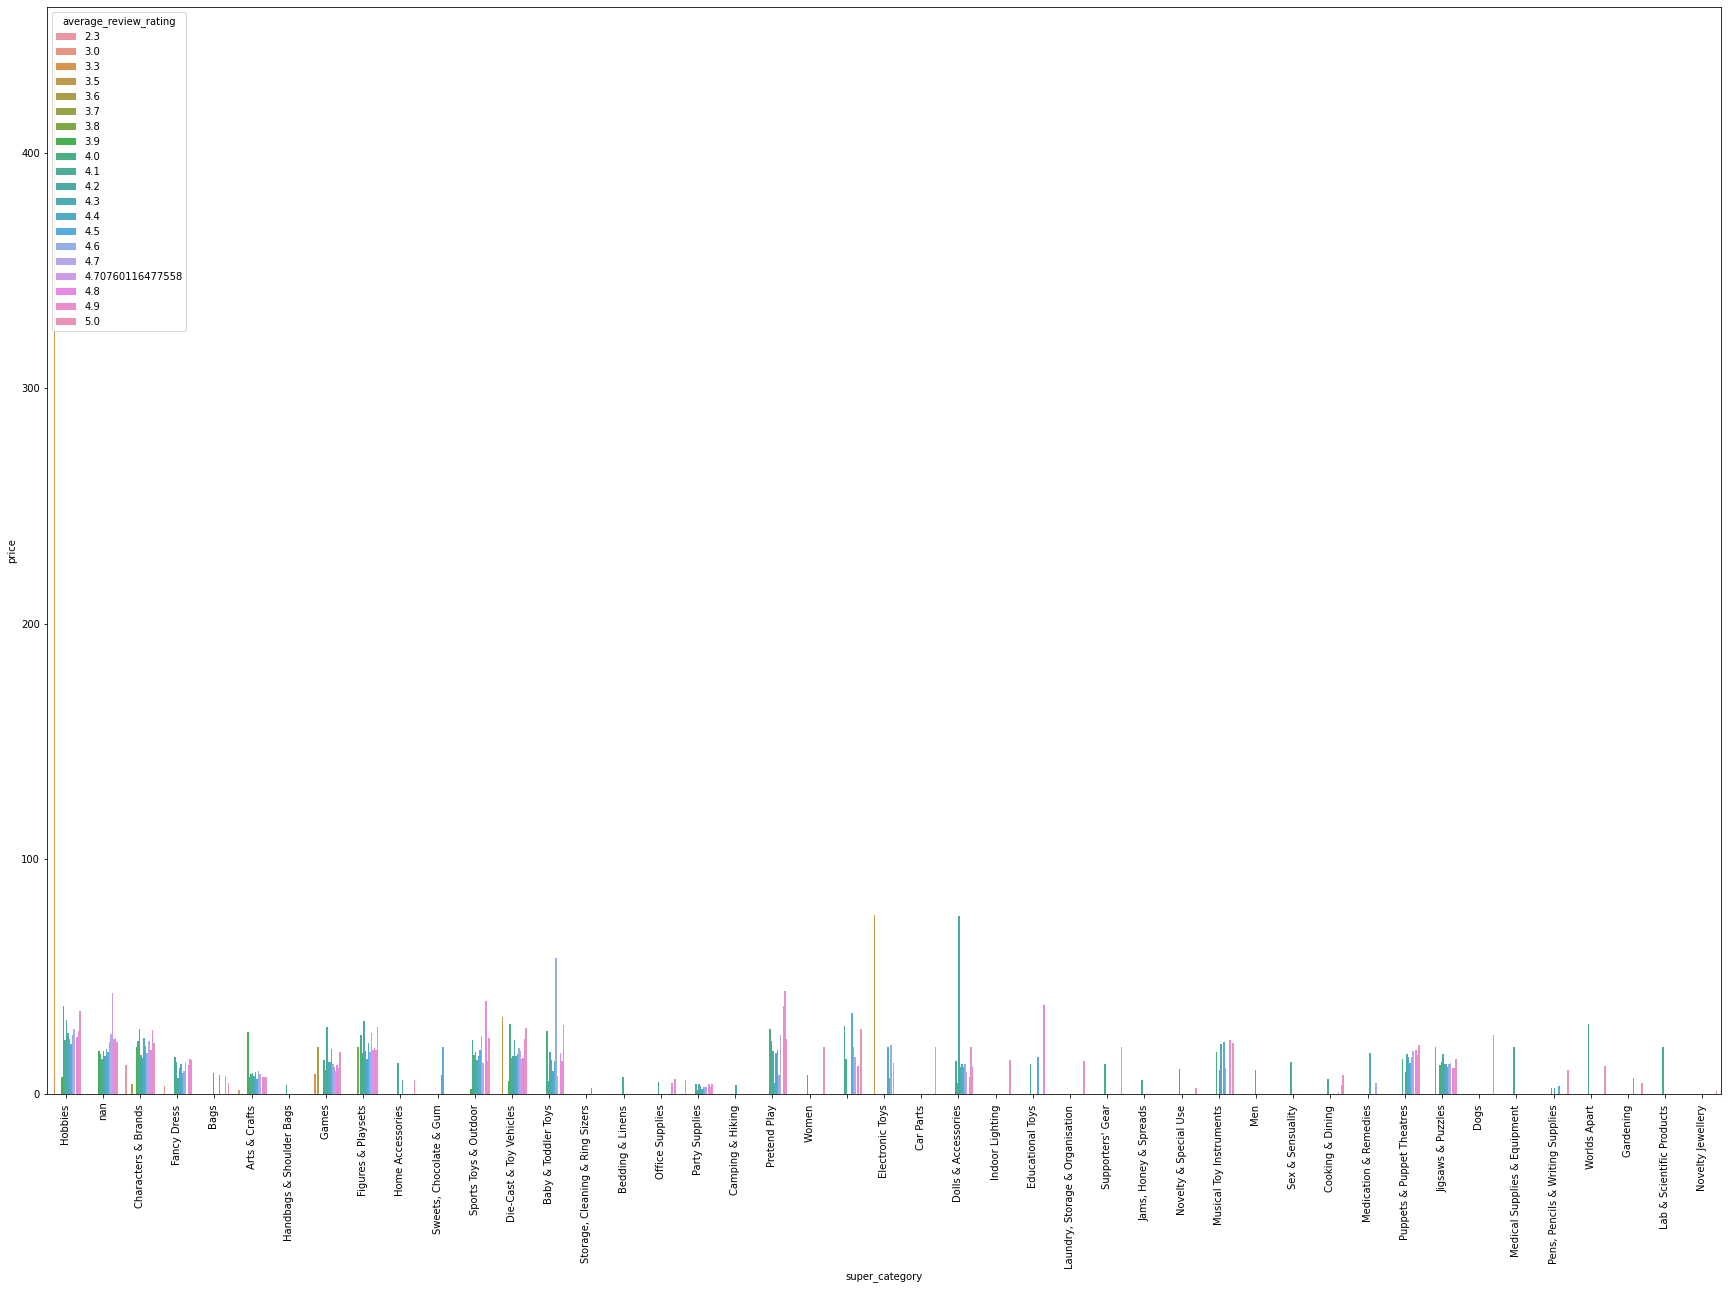

In [18]:
plt.figure(figsize=(30,20))
sns.barplot(hue=dataset['average_review_rating'],x=dataset['super_category'],y=dataset['price'],ci=None,data=dataset)
plt.xticks(rotation='vertical')

Attempting to create the base of a code to Bar Plot the different Manufacturers and their price and rating upon entering the Super Category and Sub Category [Returns an empty list as the control never enters the inner for loop for some reason :/] 

In [19]:
print(dataset['super_category'].unique())
a=input("Enter the super category from the above options")
print(dataset['specific_category'].unique())
b=input("Enter the specific category from the above options")
mn=[]
nr=[]
cr=[]
for i in range(0,9978):
   if(i not in index and i not in [2003,2004,2005,2006,2006,2007,2008,2009,2010,2011,2012,2013,2014]):
     if(str(a) is str(dataset['super_category'][i]) and str(b) is str(dataset['specific_category'][i])):
       mn.append(dataset['manufacturer'][i])
       nr.append(dataset['number_of_reviews'][i])
       cr.append(dataset['average_review_rating'][i])
print(mn)
print(nr)
print(cr)

['Hobbies ' 'nan' 'Characters & Brands ' 'Fancy Dress ' 'Bags '
 'Arts & Crafts ' 'Handbags & Shoulder Bags ' 'Games '
 'Figures & Playsets ' 'Home Accessories ' 'Sweets, Chocolate & Gum '
 'Sports Toys & Outdoor ' 'Die-Cast & Toy Vehicles '
 'Baby & Toddler Toys ' 'Storage, Cleaning & Ring Sizers '
 'Bedding & Linens ' 'Office Supplies ' 'Party Supplies '
 'Camping & Hiking ' 'Pretend Play ' 'Women ' ' ' 'Electronic Toys '
 'Car Parts ' 'Dolls & Accessories ' 'Indoor Lighting '
 'Educational Toys ' 'Laundry, Storage & Organisation '
 "Supporters' Gear " 'Jams, Honey & Spreads ' 'Novelty & Special Use '
 'Musical Toy Instruments ' 'Men ' 'Sex & Sensuality ' 'Cooking & Dining '
 'Medication & Remedies ' 'Puppets & Puppet Theatres '
 'Jigsaws & Puzzles ' 'Dogs ' 'Medical Supplies & Equipment '
 'Pens, Pencils & Writing Supplies ' 'Worlds Apart ' 'Gardening '
 'Lab & Scientific Products ' 'Novelty Jewellery ']
Enter the super category from the above optionsHobbies
[' Trains' ' Lamps & Lig

Finding the Average Overall Rating of each manufacturer in hopes of Plotting a Bar Graph Grouping manufacturers with a similar rating [Not able to group and plot using groupby]

In [20]:
l1=[]
for i in range(len(manu)):
  count=0
  sum=0
  mf=manu[i]
  for j in range(0,9978):
    if(j not in index and j not in [2003,2004,2005,2006,2006,2007,2008,2009,2010,2011,2012,2013,2014]):
      if(mf==dataset['manufacturer'][j]):
        sum=sum+dataset['average_review_rating'][j]
        count=count+1
  try:
    avg = sum / count
  except ZeroDivisionError:
    avg = 0
  avg1=round(avg,1)
  l1.append([mf,avg1])
print(l1)

[['Hornby', 4.7], ['FunkyBuys', 4.3], ['ccf', 3.9], ['Generic', 4.7], ['Chuggington', 4.6], ['Kato (USA)', 5.0], ['Bachmann', 4.8], ['Kato', 5.0], ['Power Trains', 4.8], ['Preiser', 4.9], ['Takara Tomy', 4.9], ['Roco', 4.9], ['Fisher-Price', 4.8], ['Gaugemaster', 4.9], ['Faller', 4.7], ['Topro', 5.0], ['Dapol', 4.6], ['Ratio', 5.0], ['ARSUK', 4.2], ['Trix', 5.0], ['RAILWAY - BACHMANN', 4.7], ['Busch', 4.8], ['Piko', 5.0], ['Corgi', 4.8], ['Sohni-Wicke', 5.0], ['Train Tech', 4.8], ['CATO', 5.0], ['POWER CITY TRAINS', 4.7], ['Train', 5.0], ['Sales La', 4.0], ['Märklin my world', 5.0], ['Mattel', 4.7], ['Graham Farish', 4.0], ['Carousel', 4.5], ['Peptim Scenics', 4.0], ['Learning Curve', 4.8], ['Walthers Trainline', 5.0], ['Woodland Scenics', 5.0], ['Peco', 4.7], ['Fisher Price', 4.8], ['Jouef', 5.0], ['Thomas & Friends', 4.6], ['Plan Toys', 4.9], ['Bandai', 4.7], ['Atlas', 4.5], ['NMIT', 4.6], ['Viessmann', 4.7], ['Tommy Tech', 4.8], ['Model Power', 5.0], ['Micki Leksaker', 5.0], ['LELIN

Using the powerful groupby function to barplot Number of Reviews and Product Value [Seaborn]

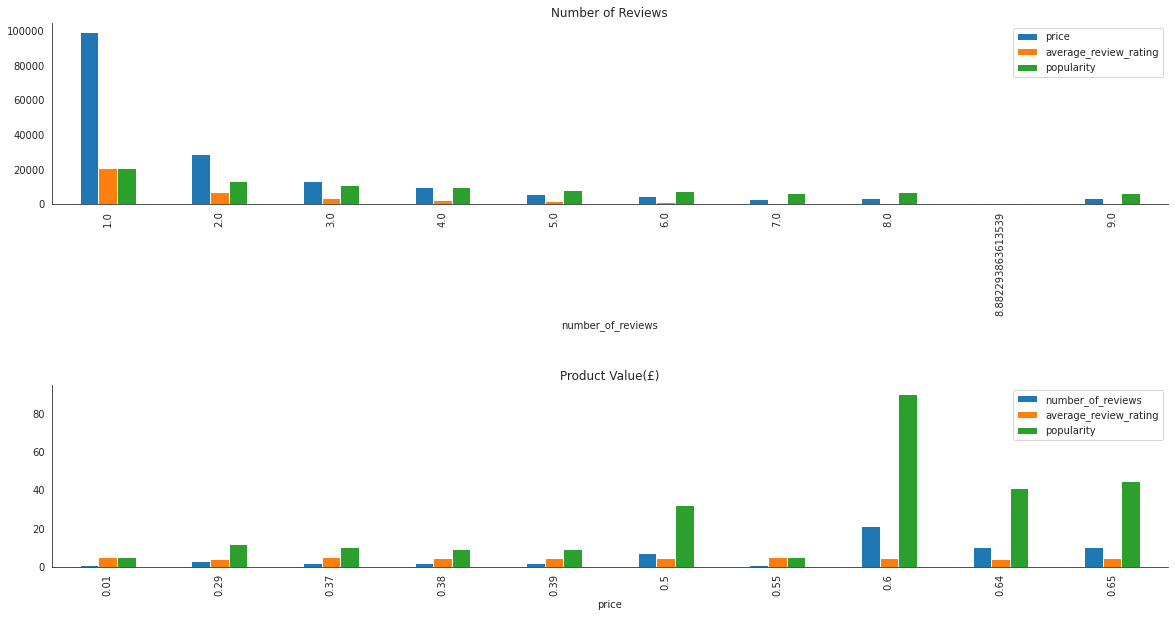

In [38]:
sns.set_style("white")
f, axarr = plt.subplots(2, 1, figsize=(20,10))
f.subplots_adjust(hspace=1)
(dataset.groupby('number_of_reviews').sum().head(10).plot.bar(title='Number of Reviews', ax=axarr[0]))
(dataset.groupby('price').sum().head(10).plot.bar(title='Product Value(£)', ax=axarr[1]))
sns.despine()

Dropping rows which gave key errors in further steps

In [22]:
dataset=dataset.drop(8876)

In [23]:
dataset=dataset.drop(9319)

Convering the number of reviews column from string to float

In [24]:
dataset['number_of_reviews']=pd.to_numeric(dataset['number_of_reviews'])

Imputing the missing data in number of reviews with the mean

In [25]:
x = dataset['number_of_reviews'].mean()
dataset['number_of_reviews'].fillna(x, inplace = True)

In [26]:
print(dataset['number_of_reviews'])

0        15.0
1         2.0
2        17.0
3         1.0
4         3.0
         ... 
9999      3.0
10000     1.0
10001     1.0
10002     1.0
10003    11.0
Name: number_of_reviews, Length: 9976, dtype: float64


Creating a new column of popularity to sort products based on both number of reviews and average review rating

In [27]:
dataset['popularity']=dataset['number_of_reviews']*dataset['average_review_rating']

In [28]:
print(dataset)

                                uniq_id  \
0      eac7efa5dbd3d667f26eb3d3ab504464   
1      b17540ef7e86e461d37f3ae58b7b72ac   
2      348f344247b0c1a935b1223072ef9d8a   
3      e12b92dbb8eaee78b22965d2a9bbbd9f   
4      e33a9adeed5f36840ccc227db4682a36   
...                                 ...   
9999   44d6967f083825a5de36ad4865a65bcd   
10000  08f0747b6fc6687215ffb994c3a6fb32   
10001  bf6cc073f8f24e6e338190fa16f6ee9d   
10002  cd783d0b8b44e631b9788b203eaaefae   
10003  94d18e86e504bee1e392df7e5738b18a   

                                            product_name  \
0                                  Hornby 2014 Catalogue   
1      FunkyBuys® Large Christmas Holiday Express Fes...   
2      CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...   
3         HORNBY Coach R4410A BR Hawksworth Corridor 3rd   
4      Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...   
...                                                  ...   
9999   Batman 1966 TV Series Action Figures - The Rid...   
100

Recommending the best product by popularity and related products when the user enters a keyword related to that product

In [34]:
def recommend(name):
  prod=[]
  py=[]
  re=[]
  for i in range(0,9977):
    if(i not in index and i not in [2003,2004,2005,2006,2006,2007,2008,2009,2010,2011,2012,2013,2014,8876,9319]):
      if(name.lower() in str(dataset['description'][i]).lower()):
        prod.append(dataset['product_name'][i])
        py.append(dataset['popularity'][i])
        re.append(dataset['items_customers_buy_after_viewing_this_item'][i])
  keydict = dict(zip(prod, py))
  prod.sort(key=keydict.get)
  print("Here is the most popular product")
  print(prod[0])
  keydict = dict(zip(re, py))
  re.sort(key=keydict.get)
  print("People who bought ",prod[0]," also bought ",re[0])

recommend(input("What item are you looking for?"))

What item are you looking for?Pony
Here is the most popular product
My Little Pony - Minty Winter Series - approx. 11 cm - Hasbro - ARTICLE NEW
People who bought  My Little Pony - Minty Winter Series - approx. 11 cm - Hasbro - ARTICLE NEW  also bought  http://www.amazon.co.uk/1000pk-Metallic-Pearlised-Glitter-Assortment | http://www.amazon.co.uk/Pony-Bead-Value-Pkg-Transparent | http://www.amazon.co.uk/Ark-Craft-Glitter-Assorted-Colours/dp/B00INT8JD0 | http://www.amazon.co.uk/Transparent


Recommending the best product by popularity and related products when the user enters the specific category of that product

In [33]:
def recommend(name):
  prod=[]
  py=[]
  re=[]
  for i in range(0,9977):
    if(i not in index and i not in [2003,2004,2005,2006,2006,2007,2008,2009,2010,2011,2012,2013,2014,8876,9319]):
      if(name.lower() in str(dataset['description'][i]).lower()):
        prod.append(dataset['product_name'][i])
        py.append(dataset['popularity'][i])
        re.append(dataset['items_customers_buy_after_viewing_this_item'][i])
  keydict = dict(zip(prod, py))
  prod.sort(key=keydict.get)
  print("Here is the most popular product")
  print(prod[0])
  keydict = dict(zip(re, py))
  re.sort(key=keydict.get)
  print("People who bought ",prod[0]," also bought ",re[0])

print(dataset['specific_category'].unique())
recommend(input("What specific category are you looking for from the above options?"))

[' Trains' ' Lamps & Lighting' ' Locomotives' ' Signal & Sound'
 ' Recreational Activities' ' Transformers & Decoders' 'nan'
 ' Wooden Thomas' ' Control Moduls' ' Landscaping' ' Motor Road & Rail'
 ' Hasbro' ' Toys' ' Costumes' ' Bags' " Children's Craft Kits" ' Tomy'
 " Kids'" ' Dice & Dice Games' ' Board Games' ' Art Sand' ' Felt Kits'
 ' Farm & Animals' ' Barbie' ' Window Stickers' ' Glitter' ' Pirates'
 ' Science Fiction & Fantasy' ' Knights & Castles' ' Chocolate'
 ' Beach Toys' ' Vehicles' ' Boats' ' Pushchair Toys' ' Figures'
 ' Action Man' ' Collectible Figures & Accessories'
 ' Collectible Props & Memorabilia' ' Bobbleheads & Busts'
 ' Rockets & Spaceships' ' Accessories' ' Bead Art & Jewellery-Making'
 " Children's Chalk" ' Blackboards' ' Boxes & Organisers' ' Flat Sheets'
 ' Crayola' ' Paper & Stickers' ' Painting By Numbers'
 ' Early Learning Centre' ' Labels & Stickers' ' Model Building Tools'
 ' Christmas' ' Banners' ' Doll Making' ' Airbeds & Inflating Devices'
 ' Water 

Recommending the best product by popularity and related products when the user enters the super/main category of that product

In [36]:
def recommend(name):
  prod=[]
  py=[]
  re=[]
  for i in range(0,9977):
    if(i not in index and i not in [2003,2004,2005,2006,2006,2007,2008,2009,2010,2011,2012,2013,2014,8876,9319]):
      if(name.lower() in str(dataset['description'][i]).lower()):
        prod.append(dataset['product_name'][i])
        py.append(dataset['popularity'][i])
        re.append(dataset['items_customers_buy_after_viewing_this_item'][i])
  keydict = dict(zip(prod, py))
  prod.sort(key=keydict.get)
  print("Here is the best product according to the product ratings")
  print(prod[0])
  keydict = dict(zip(re, py))
  re.sort(key=keydict.get)
  print("People who bought ",prod[0]," also bought ",re[0])

print(dataset['super_category'].unique())
recommend(input("What super category are you looking for from the above options?"))

['Hobbies ' 'nan' 'Characters & Brands ' 'Fancy Dress ' 'Bags '
 'Arts & Crafts ' 'Handbags & Shoulder Bags ' 'Games '
 'Figures & Playsets ' 'Home Accessories ' 'Sweets, Chocolate & Gum '
 'Sports Toys & Outdoor ' 'Die-Cast & Toy Vehicles '
 'Baby & Toddler Toys ' 'Storage, Cleaning & Ring Sizers '
 'Bedding & Linens ' 'Office Supplies ' 'Party Supplies '
 'Camping & Hiking ' 'Pretend Play ' 'Women ' ' ' 'Electronic Toys '
 'Car Parts ' 'Dolls & Accessories ' 'Indoor Lighting '
 'Educational Toys ' 'Laundry, Storage & Organisation '
 "Supporters' Gear " 'Jams, Honey & Spreads ' 'Novelty & Special Use '
 'Musical Toy Instruments ' 'Men ' 'Sex & Sensuality ' 'Cooking & Dining '
 'Medication & Remedies ' 'Puppets & Puppet Theatres '
 'Jigsaws & Puzzles ' 'Dogs ' 'Medical Supplies & Equipment '
 'Pens, Pencils & Writing Supplies ' 'Worlds Apart ' 'Gardening '
 'Lab & Scientific Products ' 'Novelty Jewellery ']
What super category are you looking for from the above options?Games
Here is th